# Predicting with ML

In [1]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, r2_score

In [2]:

# # Read CSV files into dataframes

# # File paths
# path = 'Data\parkinsons_updrs.data'


# # Using pd.read_csv() method to read the data into a pandas dataframe
# prediction_df = pd.read_csv(path)

# # Display the first 5 rows of the dataframe to show the data was read in properly
# print(prediction_df.head())

In [3]:
import sqlite3
import pandas as pd
conn = sqlite3.connect('parkinsons.db')
prediction_df=pd.read_sql_query("SELECT * FROM parkinsonsP", conn)
conn.close()

In [4]:

y= prediction_df[['motor_UPDRS']]
X = prediction_df.drop(columns=['subject#','sex','age','test_time','motor_UPDRS','total_UPDRS','Jitter(%)','Jitter:RAP','Shimmer:APQ11','Shimmer','Shimmer(dB)','Shimmer:APQ3','Shimmer:APQ5','Jitter:PPQ5'])


# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Create scaler instance
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit the scaler
scaler.fit(X_train)

# Scale the data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
Cnames=X.columns.to_list()
Cnames

['Jitter(Abs)',
 'Jitter:DDP',
 'Shimmer:DDA',
 'NHR',
 'HNR',
 'RPDE',
 'DFA',
 'PPE']

In [6]:

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.svm import SVR

In [7]:
models = {
    "Linear Regression": LinearRegression(),
    "Support Vector Regression": SVR(),
    "Random Forest": RandomForestRegressor(random_state=0),
    "Gradient Boosting": GradientBoostingRegressor(random_state=0)
}

In [8]:
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    results[name] = [mae,r2]

results

e:\ProgramData\anaconda3\envs\dev\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\wemlh\AppData\Local\Temp\ipykernel_6372\3159239396.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)
e:\ProgramData\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'Linear Regression': [6.613220541837893, 0.08009014565864259],
 'Support Vector Regression': [6.762511372886598, 0.015131855195937738],
 'Random Forest': [5.2726956269571135, 0.32648004369160954],
 'Gradient Boosting': [5.800083332602308, 0.24440254593169597]}

In [9]:
import tensorflow as tf

# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1024, activation='tanh', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

# Compile the model
model.compile(optimizer='adam', loss='mean_absolute_error')
model.summary()







Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              9216      
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 665601 (2.54 MB)
Trainable params: 665601 (2.54 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
# Train the model
model.fit(X_train_scaled, y_train, epochs=100, batch_size=10)

Epoch 1/100

441/441 [==============================] - 2s 3ms/step - loss: 7.5013
Epoch 2/100
441/441 [==============================] - 1s 3ms/step - loss: 6.5161
Epoch 3/100
441/441 [==============================] - 1s 3ms/step - loss: 6.2291
Epoch 4/100
441/441 [==============================] - 1s 3ms/step - loss: 6.1435
Epoch 5/100
441/441 [==============================] - 1s 3ms/step - loss: 5.9642
Epoch 6/100
441/441 [==============================] - 1s 3ms/step - loss: 5.8743
Epoch 7/100
441/441 [==============================] - 1s 3ms/step - loss: 5.6895
Epoch 8/100
441/441 [==============================] - 1s 3ms/step - loss: 5.7058
Epoch 9/100
441/441 [==============================] - 1s 3ms/step - loss: 5.6005
Epoch 10/100
441/441 [==============================] - 1s 3ms/step - loss: 5.5150
Epoch 11/100
441/441 [==============================] - 1s 3ms/step - loss: 5.4292
Epoch 12/100
441/441 [==============================] - 1s 3ms/step - loss: 5.2809
Epoch 13/100

In [11]:
# Evaluate the model
predictions = model.predict(X_test_scaled)


46/46 [==============================] - 0s 1ms/step


In [12]:
loss_nn = model.evaluate(X_test_scaled, y_test, verbose=0)
loss_nn

4.73675537109375

In [13]:

mae_nn=mean_absolute_error(y_test, predictions)
mae_nn

4.736755575257957

In [14]:
r2_nn = r2_score(y_test, predictions)
r2_nn

0.34369626342822146

In [15]:
results['Neural Network']=[mae_nn,r2_nn]

In [16]:
results

{'Linear Regression': [6.613220541837893, 0.08009014565864259],
 'Support Vector Regression': [6.762511372886598, 0.015131855195937738],
 'Random Forest': [5.2726956269571135, 0.32648004369160954],
 'Gradient Boosting': [5.800083332602308, 0.24440254593169597],
 'Neural Network': [4.736755575257957, 0.34369626342822146]}

In [17]:
import matplotlib.pyplot as plt
import numpy as np

In [18]:

# Prepare data for the plots
mae_values = [result[0] for result in results.values()]
r2_values = [result[1] for result in results.values()]
model_names = list(results.keys())

Text(0.5, 1.0, 'MAE Values for Different Models')

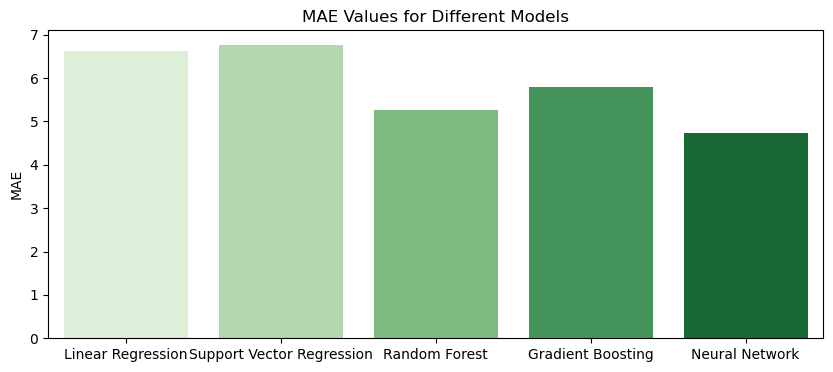

In [21]:
import seaborn as sns
positions = np.arange(len(model_names))
plt.figure(figsize=(10, 4))
sns.barplot(x=positions, y=mae_values, palette='Greens')
# plt.bar(positions, mae_values, align='center', alpha=0.7, palette='Greens')
plt.xticks(positions, model_names)
plt.ylabel('MAE')
plt.title('MAE Values for Different Models')


Text(0.5, 1.0, 'R2 Values for Different Models')

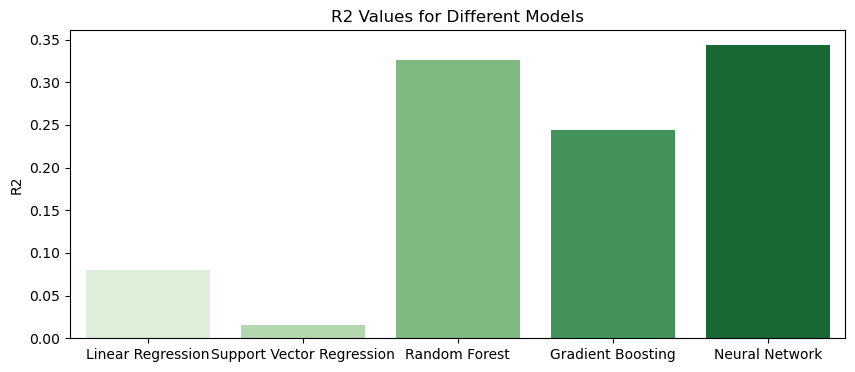

In [22]:
plt.figure(figsize=(10, 4))
sns.barplot(x=positions, y=r2_values, palette='Greens')
# plt.bar(positions, r2_values, align='center', alpha=0.7, palette='Greens')
plt.xticks(positions, model_names)
plt.ylabel('R2')
plt.title('R2 Values for Different Models')